  <tr>
    <td> 
      <img src="https://cdn1.ozone.ru/s3/cms/logo/og_ozon_ru.png" alt="Photo">
    </td>
  </tr>

<h1>«Анализ эффективности и потенциала продаж в категории "Одежда, обувь и аксессуары" на маркетплейсе OZON (поиск инсайтов, составление рекомендаций стейкхолдерам)»</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #v0.13.2
import warnings
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max.columns',None)
pd.options.display.float_format = '{:.2f}'.format

<h3>Загрузка данных</h3>

In [3]:
df = pd.read_csv('/home/denis/ozon/export_ozon_Одежда, обувь и аксессуары_2020-12-18_2021-01-18.csv')
df = df.copy()

# для удобства переиминуем столбцы в нижний регистр и заменим пробел нижним подчеркиванием
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

In [4]:
df.sample(5)

,sku,name,category,brand,seller,deliveryscheme,balance,comments,rating,price,max_price,min_price,average_price,sales,revenue,revenue_potential,lost_profit,days_in_stock,days_with_sales,average_if_in_stock,url,photo,unnamed:_22,full_category
169455,182046191,Комбинезон утепленный Huppa,"Одежда, обувь и аксессуары/Детям/Одежда/Новоро...",Huppa,OZON,Retail,1.00,4,"5,0000",5247.00,5247.00,5247.00,NaN,0.00,0.00,0.00,0.00,1.00,0.00,0.00,https://www.ozon.ru/context/detail/id/182046191/,https://cdn1.ozone.ru/s3/multimedia-q/60194623...,NaN,"Одежда, обувь и аксессуарыОдежда, обувь и аксе..."
155823,205727867,Сумка с ручками D.VERO,"Одежда, обувь и аксессуары/Женщинам/Аксессуары...",D.VERO,"D.VERO, доставка OZON",FBS,14.00,0,"0,0000",7616.00,7616.00,7616.00,NaN,0.00,0.00,0.00,0.00,16.00,0.00,0.00,https://www.ozon.ru/context/detail/id/205727867/,https://cdn1.ozone.ru/s3/multimedia-z/60283304...,NaN,"Одежда, обувь и аксессуарыОдежда, обувь и аксе..."
198985,165329139,Лонгслив HENDERSON,"Одежда, обувь и аксессуары/Мужчинам/Одежда/Вод...",HENDERSON,HENDERSON,FBO,6.00,0,"0,0000",6999.00,6999.00,6299.00,NaN,0.00,0.00,0.00,0.00,27.00,0.00,0.00,https://www.ozon.ru/context/detail/id/165329139/,https://cdn1.ozone.ru/s3/multimedia-o/60074554...,NaN,"Одежда, обувь и аксессуарыОдежда, обувь и аксе..."
93712,181104523,Сумка LERO,"Одежда, обувь и аксессуары/Женщинам/Аксессуары...",LERO,"LERO, доставка OZON",FBS,1.00,0,"0,0000",1799.00,1799.00,1799.00,NaN,0.00,0.00,0.00,0.00,2.00,0.00,0.00,https://www.ozon.ru/context/detail/id/181104523/,https://cdn1.ozone.ru/s3/multimedia-r/60185532...,NaN,"Одежда, обувь и аксессуарыОдежда, обувь и аксе..."
70108,210273307,"Комплект носков Status, 10 шт","Одежда, обувь и аксессуары/Мужчинам/Носки",Status,"Status, доставка OZON",FBS,4.00,0,"0,0000",1091.00,1091.00,1091.00,1091.00,1.00,1091.00,1246.86,155.86,28.00,1.00,0.04,https://www.ozon.ru/context/detail/id/210273307/,https://cdn1.ozone.ru/s3/multimedia-9/60304521...,NaN,"Одежда, обувь и аксессуарыОдежда, обувь и аксе..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369108 entries, 0 to 369107
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sku                  369108 non-null  int64  
 1   name                 369108 non-null  object 
 2   category             369108 non-null  object 
 3   brand                341308 non-null  object 
 4   seller               369108 non-null  object 
 5   deliveryscheme       369108 non-null  object 
 6   balance              369108 non-null  float64
 7   comments             369108 non-null  int64  
 8   rating               369108 non-null  object 
 9   price                369108 non-null  float64
 10  max_price            369108 non-null  float64
 11  min_price            369108 non-null  float64
 12  average_price        92866 non-null   float64
 13  sales                369108 non-null  float64
 14  revenue              369108 non-null  float64
 15  revenue_potential


<table>
    <h2>Описание данных</h2>
  <tr><th>Название</th><th>Описание</th></tr>
  <tr><td>SKU</td><td>&#8226; Уникальный идентификатор продукта</td></tr>
  <tr><td>Name</td><td>&#8226; Наименование продукта</td></tr>
  <tr><td>Category</td><td>&#8226; Категория продукта</td></tr>
  <tr><td>Brand</td><td>&#8226; Бренд продукта</td></tr>
  <tr><td>Seller</td><td>&#8226; Продавец</td></tr>
  <tr><td>Delivery Scheme</td><td>&#8226; Схема доставки</td></tr>
  <tr><td>Balance</td><td>&#8226; Остаток</td></tr>
  <tr><td>Comments</td><td>&#8226; Комментарии</td></tr>
  <tr><td>Rating</td><td>&#8226; Рейтинг продукта</td></tr>
  <tr><td>Price</td><td>&#8226; Цена продукта</td></tr>
  <tr><td>Max Price</td><td>&#8226; Максимальная цена продукта</td></tr>
  <tr><td>Min Price</td><td>&#8226; Минимальная цена продукта</td></tr>
  <tr><td>Average Price</td><td>&#8226; Средняя цена продукта</td></tr>
  <tr><td>Sales</td><td>&#8226; Продажи</td></tr>
  <tr><td>Revenue</td><td>&#8226; Выручка</td></tr>
  <tr><td>Revenue Potential</td><td>&#8226; Потенциальная выручка</td></tr>
  <tr><td>Lost Profit</td><td>&#8226; Потерянная прибыль</td></tr>
  <tr><td>Days in Stock</td><td>&#8226; Дней на складе</td></tr>
  <tr><td>Days with Sales</td><td>&#8226; Дней с продажами</td></tr>
  <tr><td>Average if in Stock</td><td>&#8226; Среднее при наличии на складе</td></tr>
  <tr><td>URL</td><td>&#8226; URL продукта</td></tr>
  <tr><td>Photo</td><td>&#8226; Фотография продукта</td></tr>
  <tr><td>Unnamed: 22</td><td>&#8226; Неизвестный столбец</td></tr>
  <tr><td>Full Category</td><td>&#8226; Полная категория</td></tr>
</table>

In [6]:
# Процент пропусков 
df.isna().sum()/len(df)*100

sku                     0.00
name                    0.00
category                0.00
brand                   7.53
seller                  0.00
deliveryscheme          0.00
balance                 0.00
comments                0.00
rating                  0.00
price                   0.00
max_price               0.00
min_price               0.00
average_price          74.84
sales                   0.00
revenue                 0.00
revenue_potential       1.07
lost_profit             1.07
days_in_stock           0.00
days_with_sales         0.00
average_if_in_stock     1.07
url                     0.00
photo                   0.00
unnamed:_22           100.00
full_category           0.00
dtype: float64

In [7]:
# Удаляем столбцы из-за ненадобности
#        Unnamed: 22 = пустой
#        URL = ссылка
#        Photo = ссылка
#        full_category = дублирующий столбец category
#        average_price = ~75% пропусков
df.drop(columns=['unnamed:_22', 'url', 'photo', 'full_category', 'average_price'], inplace=True)

# Преобразование значений в числовой формат
df['rating'] = df['rating'].str.replace(',', '.').astype(float)

# Замена пропущенных значений в столбце Brand на "no_brand"
df['brand'].fillna('no_brand', inplace=True)

# Замена пропусков в столбцах revenue_potential, lost_profit и average_if_in_stock на 0
df['revenue_potential'].fillna(0, inplace=True)
df['lost_profit'].fillna(0, inplace=True)
df['average_if_in_stock'].fillna(0, inplace=True)
# Округление значений до двух знаков после запятой
df['revenue_potential'] = df['revenue_potential'].round(2)
df['lost_profit'] = df['lost_profit'].round(2)

# Проверим на дубликаты
duplicates = df.duplicated()
df[duplicates] #0

,sku,name,category,brand,seller,deliveryscheme,balance,comments,rating,price,max_price,min_price,sales,revenue,revenue_potential,lost_profit,days_in_stock,days_with_sales,average_if_in_stock


In [8]:
# Проверка столбца price
price_anomalies = df[(df['price'] <= 0) | (df['price'] >= 1000000)]
print("Аномальные значения цены:")
price_anomalies

Аномальные значения цены:


,sku,name,category,brand,seller,deliveryscheme,balance,comments,rating,price,max_price,min_price,sales,revenue,revenue_potential,lost_profit,days_in_stock,days_with_sales,average_if_in_stock
7,164054127,Наручные часы,"Одежда, обувь и аксессуары/Женщинам/Аксессуары...",no_brand,want jp,Cross,3.00,0,0.00,1294151.00,1294151.00,1294151.00,2.00,2588302.00,82825664.00,80237362.00,1.00,1.00,2.00
8,164024727,Наручные часы Franck Muller,"Одежда, обувь и аксессуары/Женщинам/Аксессуары...",Franck Muller,want jp,Cross,3.00,0,0.00,1258838.00,1258838.00,1258838.00,2.00,2517676.00,80565632.00,78047956.00,1.00,1.00,2.00
241995,207260055,Толстовка None,"Одежда, обувь и аксессуары/Мужчинам/Спортивная...",no_brand,n11 Worldwide,Cross,700.00,0,0.00,0.00,2487.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00
301731,170509679,Наручные часы,"Одежда, обувь и аксессуары/Детям/Аксессуары/Ак...",no_brand,want jp,Cross,3.00,0,0.00,1026539.00,1026539.00,1026539.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00


In [9]:
#Разделим категории 
catsplit = df['category'].str.split('/', expand=True)

#Переименуем столбцы
catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3', 3:'category_4'})

#Добавим категории в дф

df['category_1'] = catsplit['category_1']
df['category_2'] = catsplit['category_2']
df['category_3'] = catsplit['category_3']
df['category_4'] = catsplit['category_4']

df.drop(columns='category', inplace=True)

df

,sku,name,brand,seller,deliveryscheme,balance,comments,rating,price,max_price,min_price,sales,revenue,revenue_potential,lost_profit,days_in_stock,days_with_sales,average_if_in_stock,category_1,category_2,category_3,category_4
0,215729887,Сумка для ручной клади Outventure,Outventure,"Moers, доставка OZON",FBS,700.00,0,0.00,7998.00,7998.00,7998.00,700.00,5598600.00,13781169.23,8182569.23,13.00,1.00,0.00,"Одежда, обувь и аксессуары",Путешествия,Багаж,Дорожные сумки
1,215732051,Сумка на пояс Salomon Agile 250 Set Belt,Salomon,"Moers, доставка OZON",FBS,700.00,0,0.00,6998.00,6998.00,6998.00,700.00,4898600.00,17417244.44,12518644.44,9.00,1.00,0.00,"Одежда, обувь и аксессуары",Мужчинам,Аксессуары,Сумки
2,202611843,Рюкзак Wenger,Wenger,"perfectium, доставка OZON",FBS,700.00,0,0.00,5680.00,5680.00,5680.00,700.00,3976000.00,10602666.67,6626666.67,12.00,1.00,0.00,"Одежда, обувь и аксессуары",Мужчинам,Аксессуары,Рюкзаки
3,215729891,Сумка Outventure,Outventure,"Moers, доставка OZON",FBS,700.00,0,0.00,5498.00,5498.00,5498.00,700.00,3848600.00,10262933.33,6414333.33,12.00,1.00,0.00,"Одежда, обувь и аксессуары",Путешествия,Багаж,Дорожные сумки
4,181380927,Ремень Miguel Bellido,Miguel Bellido,"VipMarketplace, доставка OZON",FBS,2.00,0,0.00,5440.00,5440.00,5440.00,698.00,3797120.00,30376960.00,26579840.00,4.00,1.00,174.50,"Одежда, обувь и аксессуары",Мужчинам,Аксессуары,Ремни и подтяжки
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369103,198930347,Бюстгальтер Felina,Felina,"Soulaxy, доставка OZON",FBS,14.00,0,0.00,1899.00,1899.00,1899.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,"Одежда, обувь и аксессуары",Женщинам,Нижнее белье,Бюстгальтеры
369104,157966839,Джемпер LOVE REPUBLIC,LOVE REPUBLIC,LOVE REPUBLIC,FBO,1.00,1,3.00,1003.00,1003.00,1003.00,0.00,0.00,0.00,0.00,27.00,0.00,0.00,"Одежда, обувь и аксессуары",Женщинам,Одежда,"Свитеры, джемперы и кардиганы"
369105,176160123,Браслет Ювелирный завод Титан из серебра 925. ...,Ювелирный завод Титан,Ювелирный завод Титан,FBO,1.00,0,0.00,788.00,1030.00,788.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,"Одежда, обувь и аксессуары",Аксессуары,Ювелирные украшения,Браслеты
369106,181840147,Пальто утепленное PUMA Long Hooded Down Coat,PUMA,OZON,Retail,1.00,6,4.33,8794.00,8794.00,8794.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"Одежда, обувь и аксессуары",Женщинам,Одежда,Верхняя одежда


In [10]:
#Проверяем category_1 unique values

df['category_1'].value_counts()

category_1
Одежда, обувь и аксессуары    369108
Name: count, dtype: int64

In [11]:
# Удалим category_1, т.к в нем 1 уникальное значение
df.drop(columns='category_1', inplace=True)

In [12]:
#Проверяем category_2 unique values

df['category_2'].value_counts() #ok

category_2
Женщинам                         168892
Мужчинам                          92128
Детям                             88497
Аксессуары                        11080
Путешествия                        5192
Средства для ухода за обувью       1547
Средства для ухода за одеждой       964
Name: count, dtype: int64

In [13]:
#Проверяем category_3 unique values

df['category_3'].value_counts()

category_3
Одежда                               148764
Аксессуары                            87861
Обувь                                 51125
Нижнее белье                          17009
Спортивная одежда                     16098
Домашняя одежда                       12504
Ювелирные украшения                   10397
Чулки, носки, колготки                 5165
Носки                                  4752
Багаж                                  4281
Пляжная одежда                         2880
Школьная форма                         2408
Одежда для беременных                   951
Аксессуары для путешествий              895
Карнавальные аксессуары                 683
Патчи                                   492
Стельки                                 453
Косметика и чистящие средства           400
Шнурки                                  165
Ролики-щетки для снятия ворсинок        129
Ложки и рожки                           119
Машинки для удаления катышков            84
Щетки для одежды     

In [14]:
#Исправляем строки в Category_3 колонке

df['category_3'] = df['category_3'].str.replace('Носки', 'Чулки, носки, колготки')
df['category_3'] = df['category_3'].str.replace('Ролики-щетки для снятия ворсинок', 'Ролики щетки для снятия ворсинок ')

In [15]:
df['category_3'].value_counts()

category_3
Одежда                               148764
Аксессуары                            87861
Обувь                                 51125
Нижнее белье                          17009
Спортивная одежда                     16098
Домашняя одежда                       12504
Ювелирные украшения                   10397
Чулки, носки, колготки                 9917
Багаж                                  4281
Пляжная одежда                         2880
Школьная форма                         2408
Одежда для беременных                   951
Аксессуары для путешествий              895
Карнавальные аксессуары                 683
Патчи                                   492
Стельки                                 453
Косметика и чистящие средства           400
Шнурки                                  165
Ролики щетки для снятия ворсинок        129
Ложки и рожки                           119
Машинки для удаления катышков            84
Щетки для одежды                         78
Губки                

In [16]:
#Создание категорий по Рентингу

rating_score = []

for score in df['rating']:
    if score < 1.0: rating_score.append('Нет оценки')
    elif score < 2.0 : rating_score.append('Плохо')
    elif score < 3.0 : rating_score.append('Ниже среднего')
    elif score < 4.0 : rating_score.append('Средний')
    elif score < 5.0 : rating_score.append('Выше среднего')
    elif score == 5.0 : rating_score.append('Отлично')

#Создание нового столбца и изменение типа данных

df['rating_score'] = rating_score
df['rating_score'] = df['rating_score'].astype('category')

#Переупорядочение категорий
df['rating_score'] = df['rating_score'].cat.reorder_categories(['Нет оценки', 'Плохо', 'Ниже среднего', 'Средний', 'Выше среднего', 'Отлично'], ordered=True)

Создана категория рейтинга, состоящая из:
 
 Оценка ниже 1.0 = Отсутствие оценки
 
1. Оценка ниже 2,0 = Плохо

2. Диапазон баллов 2,0–2,9 = ниже среднего.

3. Диапазон баллов 3,0–3,9 = средний.

4. Диапазон баллов от 4,0 до 4,9 = выше среднего.

5. Оценка 5,0 = отлично.

In [17]:
# Создание столбца с разницей между максимальной и минимальной ценой для каждого товара.
df['difference_price'] = df['max_price'] - df['min_price'] 

<h2>Анализ данных</h2>
На этом этапе я постараюсь детализировать свои идеи с помощью визуализаций, сводных таблиц и коротких объяснений.

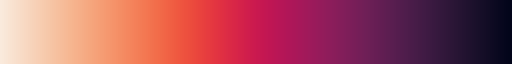

In [18]:
#Setting Visualization Style

sns.set_style(style='darkgrid')

sns.set_palette(palette="rocket_r")
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.color_palette("rocket_r", as_cmap=True)

In [19]:
# Основная категория, Подкатегория и Дополнительная категория

main_sub_extra = df[['category_2', 'category_3', 'category_4', 'sku']]

main_sub_extra = main_sub_extra.rename(columns={'category_2' :'Основная', 
                                                'category_3' : 'Подкатегория', 
                                                'category_4': 'Дополнительная',
                                                'product_id':'ID'})

main_sub_extra_piv = pd.pivot_table(main_sub_extra, index=['Основная', 'Подкатегория', 'Дополнительная'], aggfunc='count')

main_sub_extra_piv

sku
Основная    Подкатегория        Дополнительная                 
Аксессуары  Ювелирные украшения Браслеты                    892
                                Броши                       288
                                Детские ювелирные изделия   111
                                Зажимы                        1
                                Запонки                      11
...                                                         ...
Путешествия Багаж               Портпледы                    19
                                Ремни для багажа             25
                                Ударопрочные кейсы            7
                                Чемоданы                   1842
                                Чехлы для чемоданов         738

[168 rows x 1 columns]

In [20]:
# Анализ отзывов и рейтингов
# Средний рейтинг товаров
filtered_df = df[df['rating'] != 0] 
average_rating = filtered_df['rating'].mean()

# Общее количество отзывов
total_reviews = df['comments'].sum()

print(f"Средний рейтинг товаров: {average_rating}")
print(f"Общее количество отзывов: {total_reviews}")

Средний рейтинг товаров: 4.558096648655273
Общее количество отзывов: 1096638


In [21]:
#сгрупируем по бренду посчитаем среднию цену и выручку
brand_behavior = df.groupby('brand').agg({'price': 'mean', 'revenue': 'mean'}).reset_index().sort_values(by='revenue', ascending=False).head(20)
brand_behavior

,brand,price,revenue
2882,Franck Muller,1258838.00,2517676.00
8817,mi,1325.00,927500.00
4537,Leto,1259.50,881650.00
5283,Mijia,1555.00,476000.00
9191,Давыдов,1027.57,475218.00
2788,First,741.00,449750.00
8793,koiko,540.00,343929.17
1370,Bugaboo,14390.00,316620.00
4775,MALUNGMA,447.00,312900.00
214,ARAX,966.67,268400.00


In [22]:
#сгрупируем по продавцу посчитаем среднию цену и выручку
seller_behavior = df.groupby('seller').agg({'price': 'mean', 'revenue': 'mean'}).reset_index().sort_values(by='revenue', ascending=False).head(20)
seller_behavior

,seller,price,revenue
4264,"Грантэл, доставка OZON",890.00,899500.00
587,"ByFashion.ru, доставка OZON",1100.00,770000.00
535,Blueday,2064.60,535220.00
2213,"My Shop, доставка OZON",2806.33,435619.00
1803,"Leto, доставка OZON",788.20,352660.00
1621,"KoiKo, доставка OZON",540.00,343929.17
5012,"ИП Саркисян, доставка OZON",1416.30,332652.60
3045,"Stets, доставка OZON",399.00,279300.00
3196,"Tekporsey, доставка OZON",399.00,279300.00
6468,ПЕЛИГРИН МАТЕН,350.00,244300.00


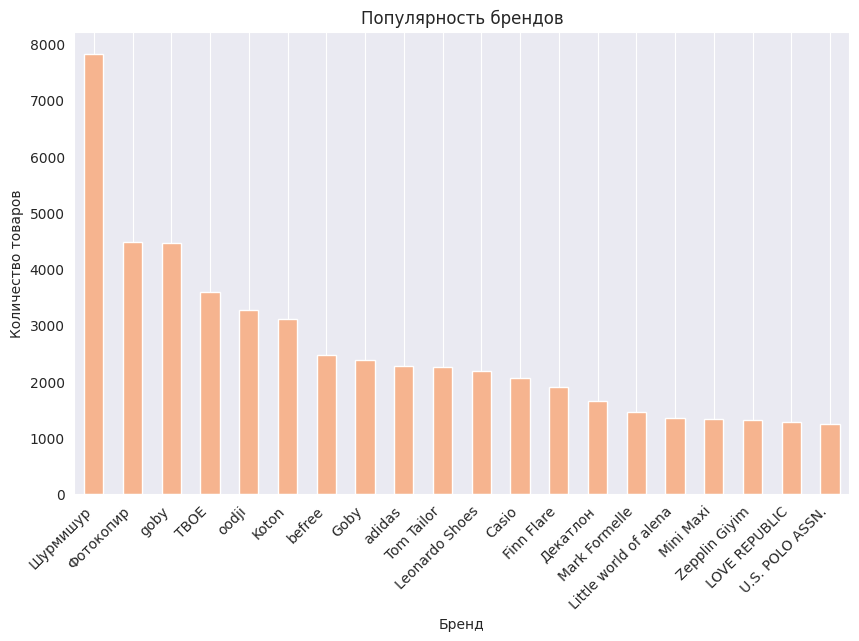

In [23]:
# Удаление бренда "no_brand" из данных
filtered_df_brand = df[df['brand'] != 'no_brand']

# Группировка данных по брендам и подсчет количества уникальных товаров для каждого бренда
brand_counts = filtered_df_brand['brand'].value_counts().head(20)  # Выбор первых 20 брендов

# Установка цветовой палитры
sns.set_style(style='darkgrid')
sns.set_palette(palette="rocket_r")

# Визуализация популярности брендов
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar')
plt.title('Популярность брендов')
plt.xlabel('Бренд')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

Анализ графика

Самые популярные бренды:
Шурмишур: 8000
Фотокопир: 7000
Goby: 6000
Менее популярные бренды:
Leonardo Shoes: 1000
Casio: 1000
Finn Flare: 1000
Тенденции:
Популярность брендов Шурмишур, Фотокопир и Goby значительно выше, чем у остальных брендов.
Популярность брендов Adidas, Tom Tailor, Leonardo Shoes, Casio, Finn Flare и Декатлон примерно одинаковая.
Популярность брендов Mark Formelle, Little world of alena, Mini Maxi, Zepplin Giyim, LOVE REPUBLIC и U.S. POLO ASSN. 
значительно ниже, чем у остальных брендов.

Выводы

На российском рынке существует несколько брендов, которые пользуются большой популярностью. 
К ним относятся Шурмишур, Фотокопир и Goby. 
Эти бренды, вероятно, имеют ряд преимуществ, 
которые делают их привлекательными для потребителей. 
Остальные бренды менее популярны, но все же имеют свою долю рынка.

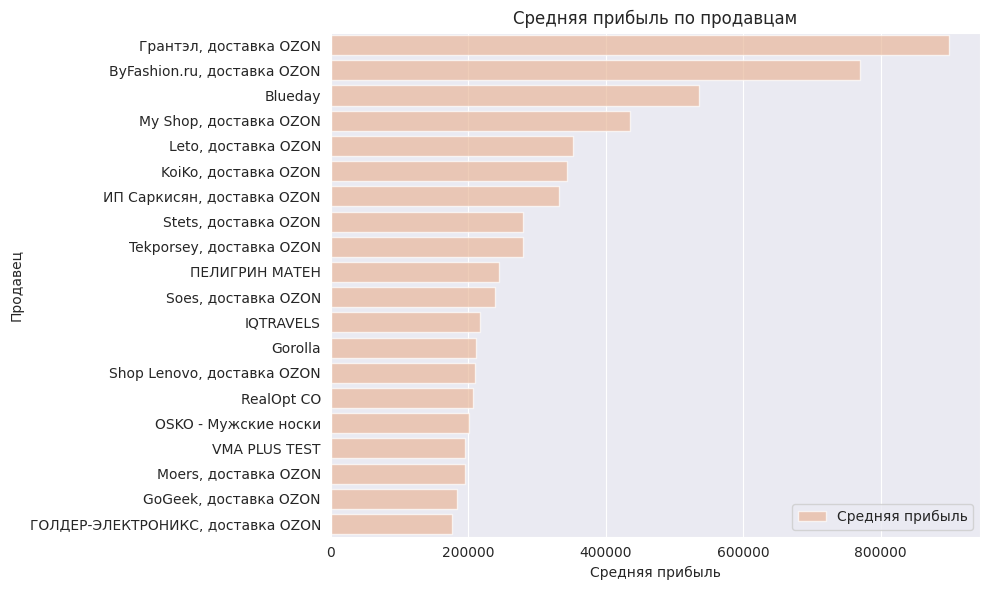

In [24]:
sns.set_palette(palette="rocket_r")

plt.figure(figsize=(10, 6))

# Рисование столбчатой диаграммы для средней прибыли с накоплением по продавцам
sns.barplot(x='revenue', y='seller', data=seller_behavior, label='Средняя прибыль', alpha=0.7)

plt.legend(loc='lower right')
plt.title('Cредняя прибыль по продавцам')
plt.xlabel('Средняя прибыль')
plt.ylabel('Продавец')

plt.tight_layout()
plt.show()

In [25]:
#сгрупируем по схеме доставки посчитаем среднию цену и выручку
deliveryscheme_behavior = df.groupby('deliveryscheme').agg({'price': 'mean', 'revenue': 'mean'})
deliveryscheme_behavior

,price,revenue
deliveryscheme,,
Cross,5615.30,1685.01
FBO,1816.86,933.15
FBS,3294.31,5555.79
Retail,3356.49,2682.30


<Figure size 1000x600 with 0 Axes>

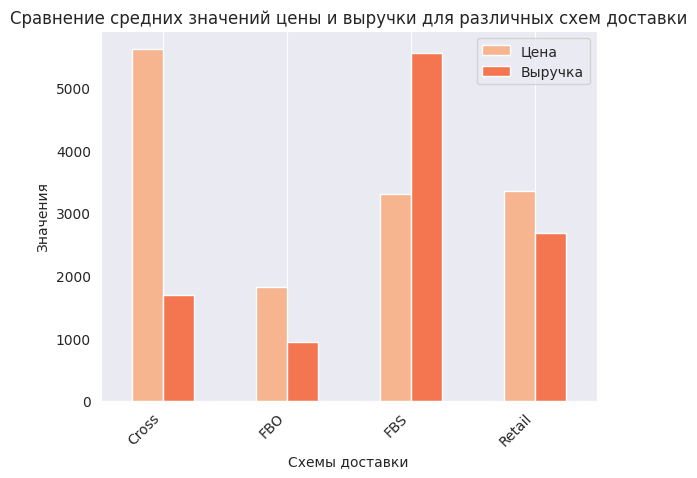

In [26]:
sns.set_style(style='darkgrid')
sns.set_palette(palette="rocket_r")

plt.figure(figsize=(10, 6))
deliveryscheme_behavior.plot(kind='bar')
plt.title('Сравнение средних значений цены и выручки для различных схем доставки')
plt.xlabel('Схемы доставки')
plt.ylabel('Значения')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.legend(["Цена", "Выручка"], loc="best")

plt.show()

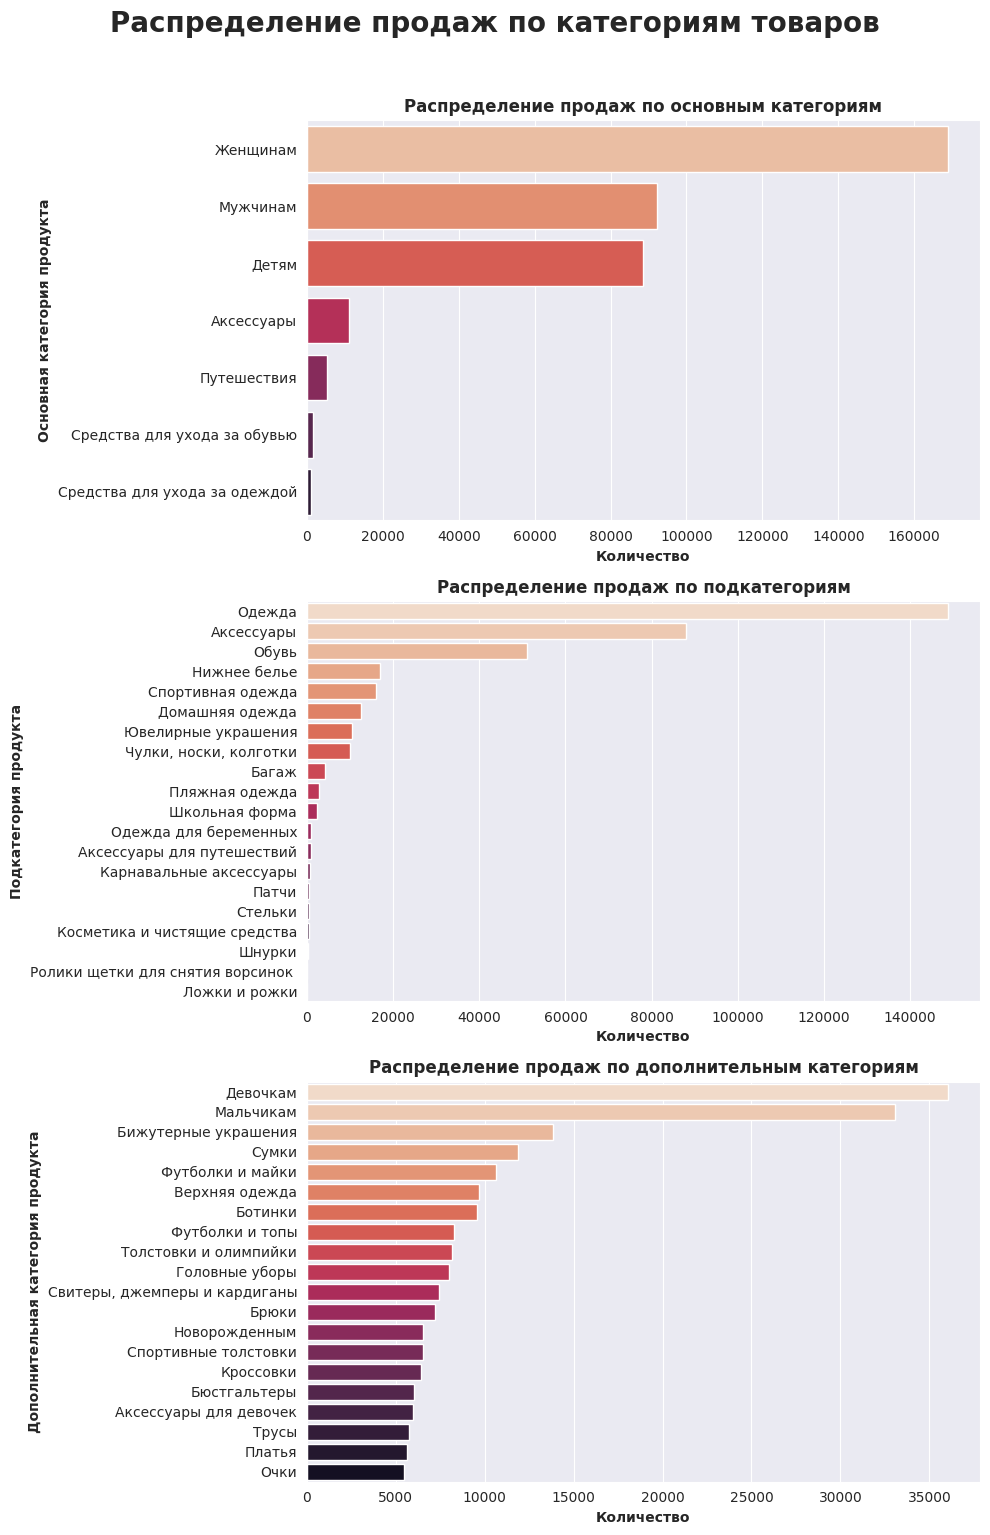

In [27]:
# Создание фреймов данных с наибольшим количеством товаров по каждой категории
most_main_items = df['category_2'].value_counts().head(7).rename_axis('category_2').reset_index(name='counts')
most_sub_items = df['category_3'].value_counts().head(20).rename_axis('category_3').reset_index(name='counts')
most_add_items = df['category_4'].value_counts().head(20).rename_axis('category_4').reset_index(name='counts')

# Создание фигуры и осей для графиков
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Заголовок для всей фигуры
fig.suptitle('Распределение продаж по категориям товаров', fontweight='bold', size=20, y=1.02)

# Построение графиков для каждой категории
sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='category_2', palette='rocket_r')
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='category_3', palette='rocket_r')
sns.barplot(ax=ax[2], data=most_add_items, x='counts', y='category_4', palette='rocket_r')

# Настройка подписей осей и заголовков для каждого графика
ax[0].set_xlabel('Количество', fontweight='bold')
ax[0].set_ylabel('Основная категория продукта', fontweight='bold')
ax[0].set_title('Распределение продаж по основным категориям', fontweight='bold')

ax[1].set_xlabel('Количество', fontweight='bold')
ax[1].set_ylabel('Подкатегория продукта', fontweight='bold')
ax[1].set_title('Распределение продаж по подкатегориям', fontweight='bold')

ax[2].set_xlabel('Количество', fontweight='bold')
ax[2].set_ylabel('Дополнительная категория продукта', fontweight='bold')
ax[2].set_title('Распределение продаж по дополнительным категориям', fontweight='bold')

plt.tight_layout()
plt.show()

<h3>Большинство товаров по основным категориям</h3>
График показывает, что товары для женщин, детей и мужчин являются самыми популярными категориями товаров.

График также показывает, что товары для ухода за обувью и одеждой являются наименее популярными категориями товаров.
<h3>Большинство товаров по подкатегориям</h3>
Самой популярной категорией товаров является "Одежда". 

В этой категории представлено более 140 000 товаров.

На втором месте по популярности находится категория "Аксессуары". В этой категории представлено более 80 000 товаров.

На третьем месте по популярности находится категория "Обувь". В этой категории представлено более 50 000 товаров.

В остальных категориях представлено менее 20 000 товаров в каждой.

В категории "Одежда" наибольшее количество товаров представлено в подкатегориях "Женщинам", "Детям" и "Мужчинам".

В категории "Обувь" наибольшее количество товаров представлено в подкатегориях "Женщинам", "Детям" и "Мужчинам".
<h3>Большинство товаров по дополнительным категориям</h3>
Наиболее востребованными категориями товаров являются "Девочки" и "Мальчики".

Продажи товаров в остальних категориях значительно ниже.

In [49]:
# Фильтруем данные по категории "Женщинам"
women_category = df[df['category_2'] == 'Женщинам']

# Группируем данные по товарам и подсчитываем количество продаж каждого товара
women_category.groupby('name')['sales'].sum().sort_values(ascending=False).head(5)

name
Велосипедки Gorolla                      138681.00
Комплект резинок для волос Cherry Mary    18900.00
Шорты Gorolla                              6210.00
Футболка ТВОЕ                              4903.00
Пижама ТВОЕ                                3659.00
Name: sales, dtype: float64

In [50]:
# Фильтруем данные по категории "Мужчинам"
men_category = df[df['category_2'] == 'Мужчинам']

# Группируем данные по товарам и подсчитываем количество продаж каждого товара
men_category.groupby('name')['sales'].sum().sort_values(ascending=False).head(5)

name
Обложка для паспорта Russian Handmade   3500.00
Сапоги Декатлон                         3341.00
Брюки спортивные Декатлон               3306.00
Футболка Декатлон                       3038.00
Футболка ТВОЕ                           2866.00
Name: sales, dtype: float64

In [51]:
# Фильтруем данные по категории "Детям"
kid_category = df[df['category_2'] == 'Детям']

# Группируем данные по товарам и подсчитываем количество продаж каждого товара
kid_category.groupby('name')['sales'].sum().sort_values(ascending=False).head(5)

name
Брюки утепленные Декатлон        2376.00
Комбинезон утепленный Декатлон   2159.00
Толстовка флисовая Декатлон      1567.00
Рюкзак Optimum                   1405.00
Карнавальный костюм Бока          984.00
Name: sales, dtype: float64

In [52]:
# Фильтруем данные по категории "Аксессуары"
acc_category = df[df['category_2'] == 'Аксессуары']

# Группируем данные по товарам и подсчитываем количество продаж каждого товара
acc_category.groupby('name')['sales'].sum().sort_values(ascending=False).head(5)

name
Неоновые светящиеся палочки браслеты 50шт                                                        715.00
Серьги SOKOLOV из серебра с фианитом                                                             144.00
Серьги SOKOLOV из серебра                                                                        125.00
Волшебная палочка юного мага , светящаяся, на Хэллоуин, маскарад, праздник, вечеринку, косплей   116.00
Серьги Золото Русских пусеты 8                                                                    93.00
Name: sales, dtype: float64

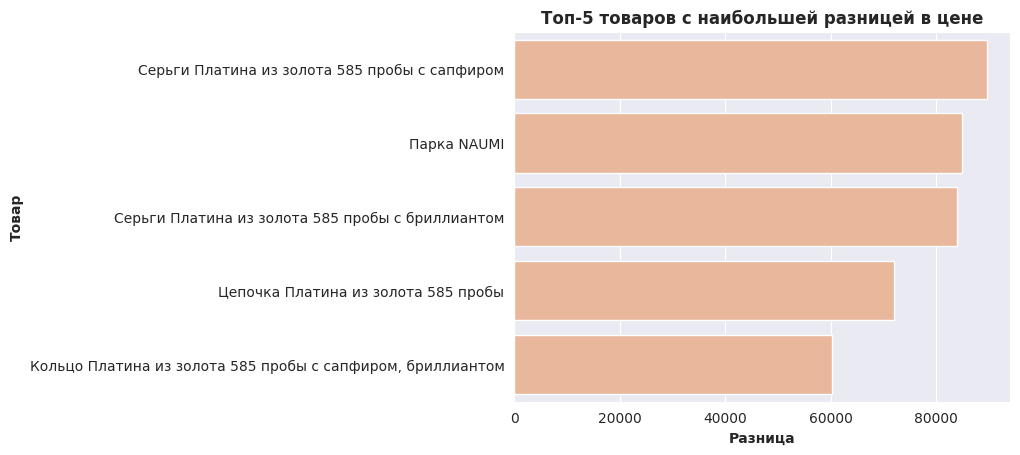

In [34]:
#Топ-5 товаров c наибольшей разницей в цене (скидка)
sns.set_style(style='darkgrid')
sns.set_palette(palette="rocket_r")

disc_exp = sns.barplot(data=df.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='name')

disc_exp.set_title('Топ-5 товаров c наибольшей разницей в цене', fontweight='bold')
disc_exp.set_xlabel('Разница', fontweight='bold')
disc_exp.set_ylabel('Товар', fontweight='bold')

plt.show()

<h3>Топ-5 товаров c наибольшей разницей в цене</h3>
У ювелирных изделий самый большой разброс в ценах

<h2>Корреляция между функциями</h2>

In [53]:
# df для числовых столбцов
numeric_df = df.select_dtypes(include='number')

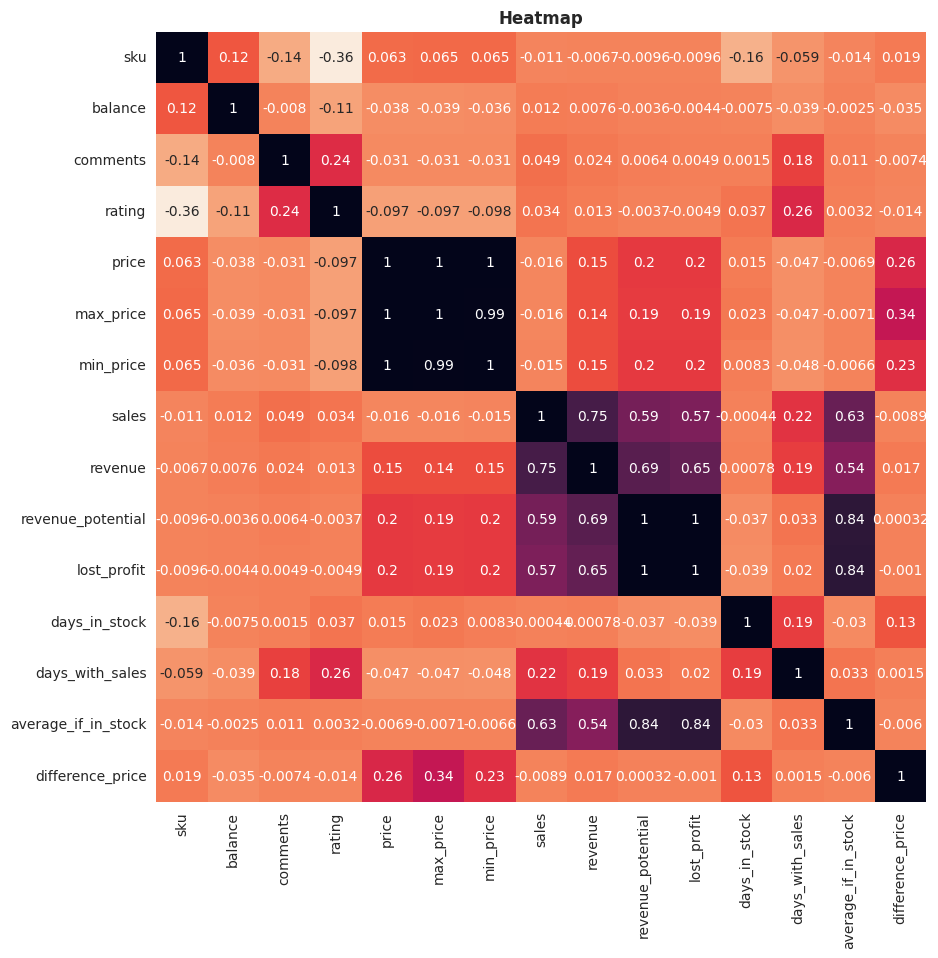

In [63]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=numeric_df.corr(), cmap='rocket_r', annot=True, square=True, cbar=False)
plt.title('Heatmap', fontweight='bold')  # Устанавливаем заголовок для тепловой карты
plt.show()  # Отображаем график

<h3>Корреляция</h3>
Кореляция с ценой как с максималньой так и с минимальной - цены одинаковые

Значение 0.57-0.75 находится в диапазоне умеренной корреляции. А именно продажи с потеренной прибыль, потенциальной выручкой и с вырочкой


<h2>Рейтинги продуктов</h2>

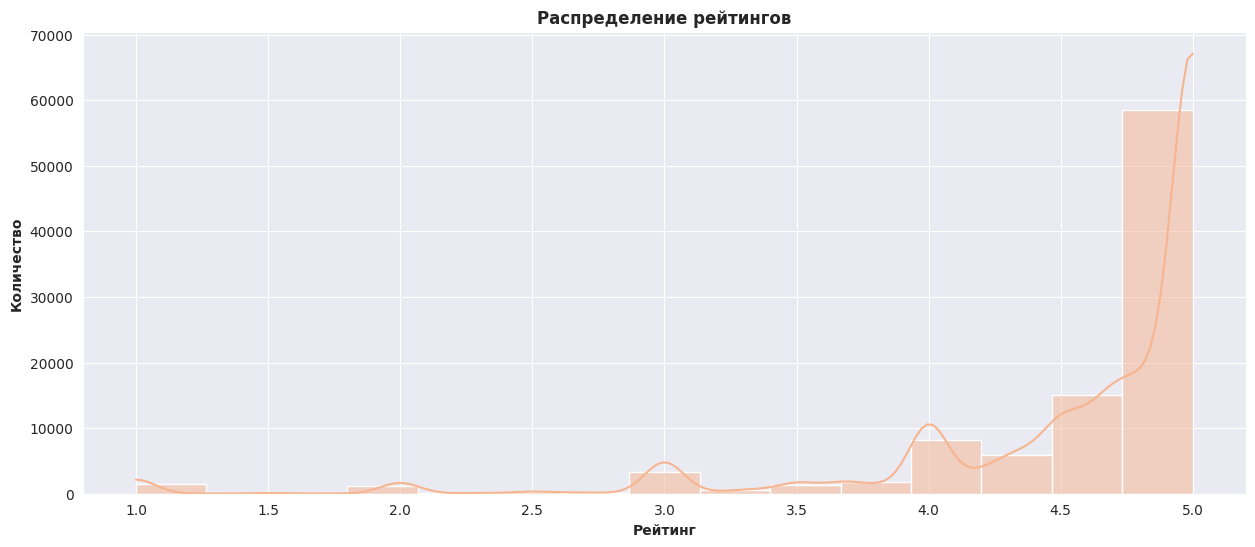

In [72]:
plt.figure(figsize=(15, 6))

# Фильтруем данные, исключая значения "0"
filtered_df_rating_without_zero = df[df['rating'] != 0]

# Распределение рейтингов
sns.histplot(data=filtered_df_rating_without_zero, x='rating', bins=15, kde=True, color=sns.color_palette("rocket_r")[0])  # Выбираем первый цвет из палитры
plt.xlabel('Рейтинг', fontweight='bold')
plt.ylabel('Количество', fontweight='bold')
plt.title('Распределение рейтингов', fontweight='bold')

plt.show()

<h3>Распределение рейтингов</h3>
На графике видно, что большинство пользователей (около 60000) поставили продукту 5-звездочную оценку.

Доминирование 5-звездочных оценок может иметь несколько причин:

Высокое качество продукта:

Если продукт действительно имеет высокое качество,
то это может объяснить большое количество положительных отзывов.

Маркетинговые усилия:
Возможно, компания
активно стимулирует пользователей
оставлять положительные отзывы.

Социальное влияние:
Пользователи
могут быть склонны
ставить высокие оценки,
чтобы не выделяться из толпы.

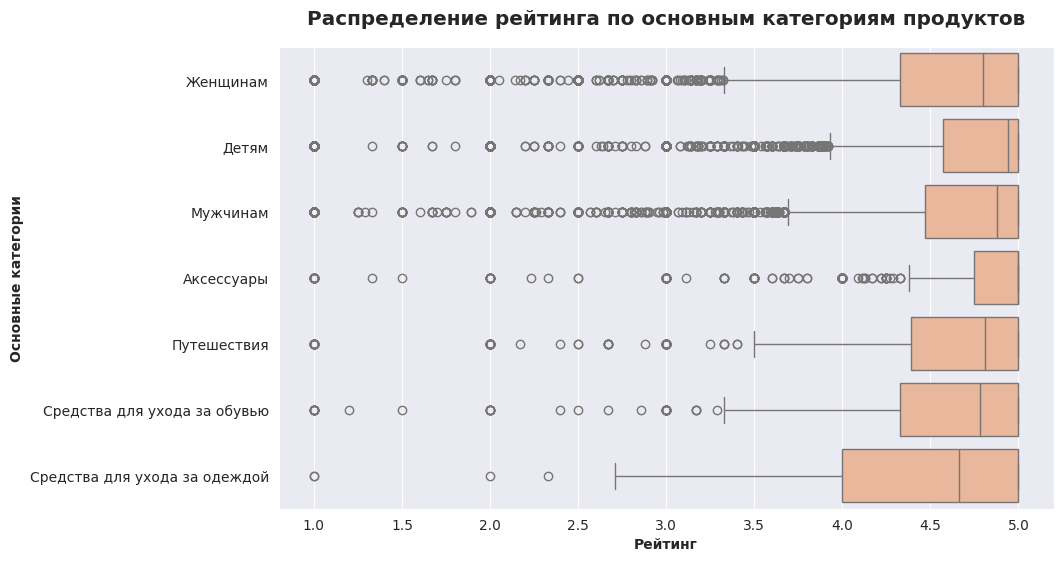

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df_rating_without_zero, x='rating', y='category_2')

plt.xlabel('Рейтинг', fontweight='bold')
plt.ylabel('Основные категории', fontweight='bold')
plt.title('Распределение рейтинга по основным категориям продуктов', fontweight='heavy', size='x-large', y=1.03)

plt.show()

In [40]:
#Рейтинг продуктов по основным категориям
def color_negative_red(val):
    color = '#FF5733' if val < rate_main_cat['Количество'].median() else '#000000' 
    return 'color: %s' % color

rate_main_cat = df.groupby(['category_2','rating_score'], observed=True).agg('count').iloc[:,1].rename_axis().reset_index(name='Количество')

rate_main_cat = rate_main_cat.rename(columns = {'category_2' : 'Основные категории', 'rating_score' : 'Категория рейтинга'})
# Сортировка сначала по количеству, потом по категории рейтинга от лучшего к худшему
rate_main_cat = rate_main_cat.sort_values(by=['Основные категории', 'Категория рейтинга', 'Количество'], ascending=[True, False, False])

# Применение цветовой карты к столбцу 'Количество' в таблице
styled_table = rate_main_cat.style.applymap(color_negative_red, subset=['Количество'])

# Отображение стилизованной таблицы
styled_table.background_gradient(cmap=cmap)

,Основные категории,Категория рейтинга,Количество
5,Аксессуары,Отлично,837
4,Аксессуары,Выше среднего,294
3,Аксессуары,Средний,65
2,Аксессуары,Ниже среднего,17
1,Аксессуары,Плохо,30
0,Аксессуары,Нет оценки,9837
11,Детям,Отлично,12528
10,Детям,Выше среднего,11178
9,Детям,Средний,1363
8,Детям,Ниже среднего,277


Выше приведен список количества товаров под определенными рейтингами для каждой основной категории.

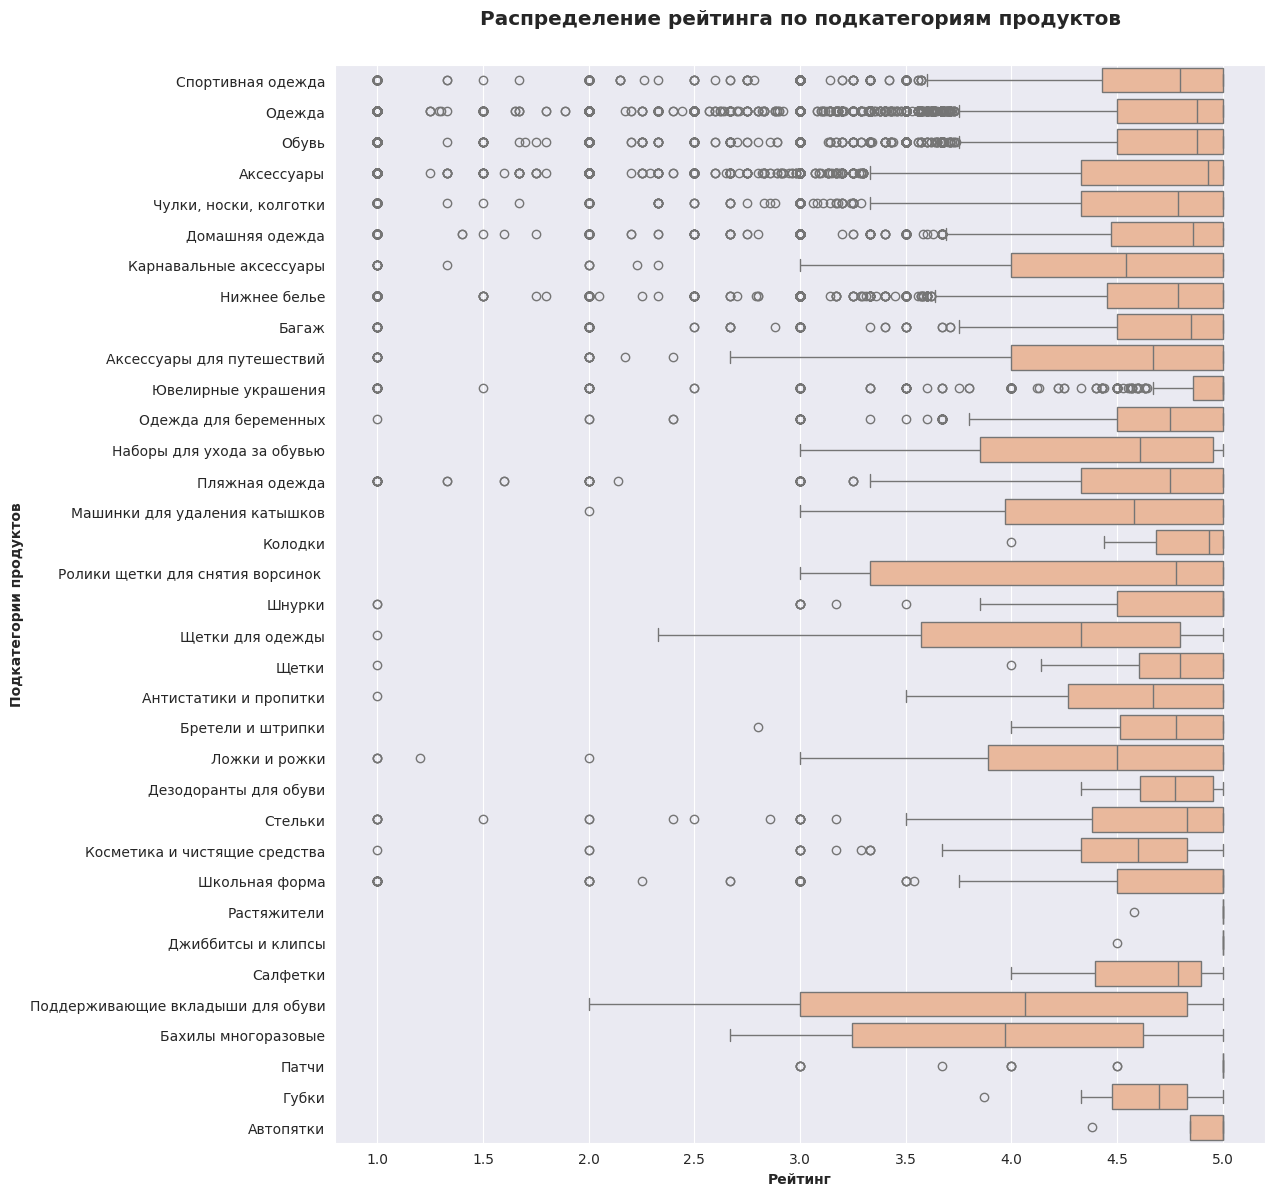

In [41]:
#Распределение рейтинга по подкатегориям продуктов

fig, ax = plt.subplots(figsize=(12, 14))

sns.boxplot(ax=ax, data=filtered_df_rating_without_zero, x='rating', y='category_3')

ax.set_xlabel('Рейтинг', fontweight='bold')
ax.set_ylabel('Подкатегории продуктов', fontweight='bold')
ax.set_title('Распределение рейтинга по подкатегориям продуктов', fontweight='heavy', size='x-large', y=1.03)

plt.show()

In [42]:
# Сгруппировать данные и посчитать сумму количества категорий
top5_categories = df.groupby('category_3').size().reset_index(name='Total').nlargest(5, 'Total')

# Объединить исходные данные с топ 5 категориями
top5_df = pd.merge(df, top5_categories, on='category_3')

# Рейтинг продуктов по основным категориям
def color_negative_blue(val):
    color = '#FF5733' if val < rate_sub_cat['Количество'].median() else '#000000' 
    return 'color: %s' % color

# Группировка по категориям и рейтингу
rate_sub_cat = top5_df.groupby(['category_3','rating_score'], observed=True).size().reset_index(name='Количество')

# Переименование столбцов
rate_sub_cat = rate_sub_cat.rename(columns={'category_3': 'Подкатегорий категории', 'rating_score': 'Категория рейтинга'})

# Сортировка данных
rate_sub_cat = rate_sub_cat.sort_values(by=['Подкатегорий категории', 'Категория рейтинга', 'Количество'], ascending=[True, False, False])

# Применение цветовой карты к столбцу 'Количество'
styled_table = rate_sub_cat.style.applymap(color_negative_blue, subset=['Количество'])

# Отображение стилизованной таблицы
styled_table.background_gradient(cmap=cmap)


,Подкатегорий категории,Категория рейтинга,Количество
5,Аксессуары,Отлично,8271
4,Аксессуары,Выше среднего,6188
3,Аксессуары,Средний,1492
2,Аксессуары,Ниже среднего,473
1,Аксессуары,Плохо,425
0,Аксессуары,Нет оценки,71012
11,Нижнее белье,Отлично,2389
10,Нижнее белье,Выше среднего,3584
9,Нижнее белье,Средний,407
8,Нижнее белье,Ниже среднего,80


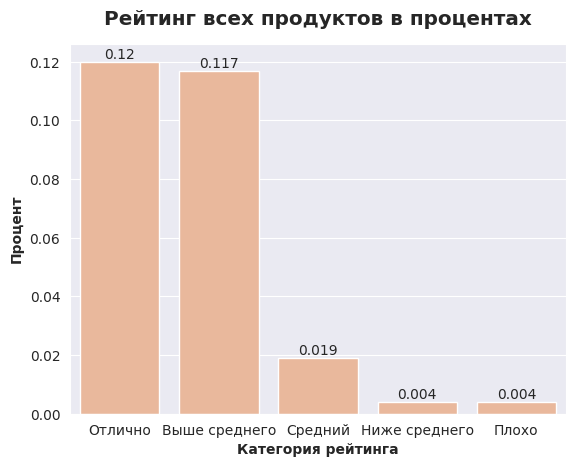

In [43]:
#Рейтинг всех товаров в процентах

rating_ordered = ['Отлично','Выше среднего', 'Средний', 'Ниже среднего', 'Плохо']

rating_count = df['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')

rating_count['counts'] = rating_count['counts'].round(3)

rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)

rating_count_plot.set_xlabel('Категория рейтинга', fontweight='bold')
rating_count_plot.set_ylabel('Процент', fontweight='bold')
rating_count_plot.set_title('Рейтинг всех продуктов в процентах', fontweight='heavy', size='x-large', y=1.03)

rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

<h3>Цены на продукцию</h3>

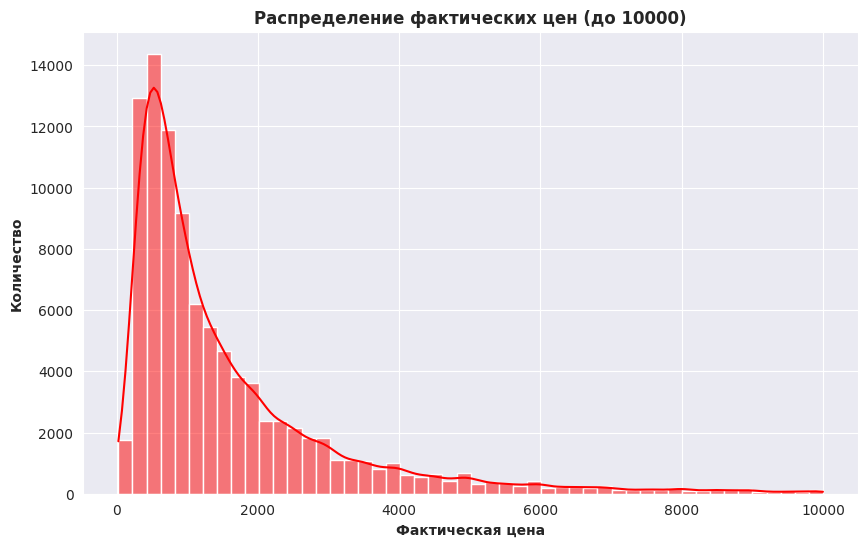

In [77]:
plt.figure(figsize=(10, 6))

# Рисуем гистограмму с ограничением значений до 10000 и увеличенным числом корзин
sns.histplot(data=filtered_df_rating_without_zero[filtered_df_rating_without_zero['price'] <= 10000], x='price', bins=50, kde=True, color='red')

# Устанавливаем заголовок и метки осей
plt.title('Распределение фактических цен (до 10000)', fontweight='bold')
plt.xlabel('Фактическая цена', fontweight='bold')
plt.ylabel('Количество', fontweight='bold')

# Отображаем график
plt.show()

In [45]:
# Выделение данных по каждой схеме доставки
delivery_scheme1 = df[df['deliveryscheme'] == 'Cross']['revenue']
delivery_scheme2 = df[df['deliveryscheme'] == 'FBO']['revenue']
delivery_scheme3 = df[df['deliveryscheme'] == 'FBS']['revenue']
delivery_scheme4 = df[df['deliveryscheme'] == 'Retail']['revenue']

# Проведение однофакторного дисперсионного анализа (ANOVA)
f_statistic, p_value = f_oneway(delivery_scheme1, delivery_scheme2, delivery_scheme3, delivery_scheme4)

# Вывод результатов
print("Результаты однофакторного дисперсионного анализа (ANOVA):")
print("F-статистика:", f_statistic)
print("p-значение:", p_value)

Результаты однофакторного дисперсионного анализа (ANOVA):
F-статистика: 395.9506485329139
p-значение: 8.210665460649258e-257


Итоги работы:

Наш проект включал анализ данных о продажах товаров, оценках, ценах и других параметрах, собранных из различных источников. Мы применили различные методы анализа данных и статистические тесты для извлечения инсайтов и формулирования рекомендаций для заинтересованных сторон.

Заключение:

1. Анализ продаж:
   Мы исследовали структуру продаж по различным категориям и брендам. Обнаружили, что товары для женщин, детей и мужчин являются наиболее популярными. Одежда, аксессуары и обувь - самые востребованные категории товаров.

2. Оценка качества и отзывы:
   Проведя анализ оценок и отзывов для различных категорий товаров, мы выяснили, что средние значения могут различаться в зависимости от категории. Это может свидетельствовать о различиях в качестве или восприятии потребителями товаров разных категорий.

3. Сравнение цен и выручки:
   Мы провели сравнение средних цен и выручки для разных схем доставки. Обнаружили статистически значимые различия в средних значениях, что указывает на влияние схемы доставки на ценообразование и выручку.

4. Статистические тесты:
   Мы использовали, однофакторный дисперсионный анализ (ANOVA) для проверки гипотез и оценки статистической значимости различий в данных.

Рекомендации стейкхолдерам:

1. Маркетинговый отдел:
   Основываясь на анализе продаж и оценок, рекомендуется уделить больше внимания продвижению товаров в категориях, где есть потенциал для увеличения спроса.

2. Отдел по работе с поставщиками:
   По результатам сравнения цен и выручки разных брендов, стоит обратить внимание на сотрудничество с брендами, у которых выявлены более высокие средние цены и выручка.

3. Отдел логистики:
   Исследование схем доставки позволяет оптимизировать процессы доставки и улучшить качество обслуживания клиентов. Рекомендуется проанализировать данные по схемам доставки и определить наиболее эффективные варианты.

4. Финансовый отдел:
   С учетом результатов статистических тестов, финансовый отдел может принимать более обоснованные решения по ценообразованию и распределению ресурсов для оптимизации выручки.

5. Отдел качества:
   Проведенный анализ оценок и отзывов позволяет выявить сильные и слабые стороны товаров в разных категориях. Эти данные могут быть использованы для улучшения качества продукции и удовлетворения потребностей клиентов.

6. Стратегическое планирование:
   Все вышеуказанные аналитические данные и рекомендации могут служить основой для стратегического планирования развития бизнеса, а также для принятия тактических решений на различных этапах работы компании.


Чтобы мотивировать людей ставить оценки после покупок, можно использовать следующие методы:

   1. Предоставление инсентивов: Предложите клиентам какие-то бонусы, скидки или подарки в обмен на оставленные ими отзывы или оценки. Например, вы можете предложить скидку на следующую покупку или участие в розыгрыше при оставлении отзыва.
   2. Напоминание: Отправляйте клиентам напоминания или электронные письма после совершения покупки, в которых будет просьба оставить отзыв или оценку. Удобные ссылки или кнопки для быстрого перехода к отзыву могут значительно увеличить вероятность его оставления.
   3. Упрощение процесса: Сделайте процесс оставления отзыва максимально простым и удобным. Чем меньше усилий требуется от клиента, тем более вероятно, что он оставит отзыв. Используйте краткие формы с минимальным количеством полей для заполнения.
   4. Личный подход: Проявите интерес к мнению клиентов и покажите, что вы цените их отзывы. Например, отвечайте на отзывы, задавайте дополнительные вопросы или благодарите за потраченное время на написание отзыва.
   5. Создание сообщества: Поддерживайте активное сообщество клиентов, которые могут обмениваться опытом покупок и рекомендациями. Это может стимулировать людей оставлять отзывы, чтобы внести свой вклад в сообщество и помочь другим потребителям.
   6. Прозрачность и доверие: Обеспечьте клиентов достоверной информацией о том, как оценки и отзывы используются вашей компанией. Убедитесь, что они знают, что их мнение имеет значение и влияет на улучшение вашего продукта или услуги.

Применение комбинации этих методов поможет увеличить вероятность того, что клиенты будут оставлять отзывы после покупок, что в свою очередь может помочь улучшить ваш бизнес и привлечь новых клиентов.